In [4]:
import os
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

In [5]:
def draw_chromophore(smiles, ax, position=(90,18)):
    rd_mol = Chem.MolFromSmiles(smiles)
    AllChem.Compute2DCoords(rd_mol)
    mol_rd_image = Draw.MolToImage(rd_mol)
    mol_image = mpimg.pil_to_array(mol_rd_image)
    imagebox = OffsetImage(mol_image, zoom=0.4)
    ab = AnnotationBbox(imagebox, position, frameon=False)
    ax.add_artist(ab)
    
def get_backbone(name):
    backbones = {'bp' : 'biphenyl', 
                 'ta' : 'thianthene',
                 'pt' : 'diphenyl_triazole',
                 'NN' : None
                }
    abriv = name.split('_')[1]
    return backbones[abriv]

def get_sidechain(name):
    r_groups = {'pa' : 'diphenylamine', 
                'ma' : 'dimethoxyphenylamine', 
                'cp' : 'dimethylamaine_cyclopropane',
                'NN' : None
               }
    abriv = name.split('_')[2]
    return r_groups[abriv]

In [6]:
home = os.getcwd()
data_file = os.path.join(home, 'master_data.json')
data = pd.read_json(data_file, orient='index')
neutral = pd.json_normalize(data.neutral, max_level=0)
neutral.set_index(data.index, inplace=True)

cation1 = pd.json_normalize(data.cation1, max_level=0)
cation1.set_index(data.index, inplace=True)
cation1 = cation1.add_prefix('cat1_')

cation2 = pd.json_normalize(data.cation2, max_level=0)
cation2.set_index(data.index, inplace=True)
cation2 = cation2.add_prefix('cat2_')

master_data = pd.concat([neutral, cation1, cation2], axis=1, join='inner')
master_data.head()

,charge,structure,energy,homo,lumo,homo_lumo_gap,opt_runtime,frequencies,frequencies_dict,freq_runtime,...,cat2_homo,cat2_lumo,cat2_homo_lumo_gap,cat2_opt_runtime,cat2_frequencies,cat2_frequencies_dict,cat2_freq_runtime,cat2_tddft_energy,cat2_excitations,cat2_tddft_runtime
mol_ta_pa_half,0,44\nH17 C24 S2 N1\nC 5.230318 -1.150914 0.1066...,-49146.856329,-8.330498,1.813912,10.144410,25.446,"[18.2865, 21.0939, 33.3641, 46.0684, 65.1624, ...","[[{'frequency': 18.2865, 'r_mass': 5.965500000...",12.100,...,-15.346685,-9.624128,5.722557,31.131,"[20.3667, 32.9214, 46.8425, 56.1394, 69.5938, ...","[[{'frequency': 20.3667, 'r_mass': 6.9158, 'f_...",11.829,-49121.765338,"{'Singlet': [[2.1256, 583.3, 0.876400000000000...",8.726
mol_bp_ma_half,0,46\nH19 C24 N1 O2\nC 6.247774 -0.199027 -1.204...,-31781.774114,-8.159338,1.988337,10.147675,23.911,"[22.3402, 24.3728, 31.3933, 40.7713, 59.3444, ...","[[{'frequency': 22.3402, 'r_mass': 6.0566, 'f_...",12.070,...,-15.506144,-9.639911,5.866234,58.714,"[27.3025, 38.8739, 47.187, 53.3433, 69.1506, 7...","[[{'frequency': 27.3025, 'r_mass': 5.7027, 'f_...",12.431,-31756.416041,"{'Singlet': [[2.6224, 472.79, 1.1856, 0.0], [2...",8.507
mol_NN_pa_frag,0,34\nH15 C18 N1\nN -0.000016 0.000093 0.000486\...,-20723.236238,-8.254850,2.080856,10.335706,15.299,"[33.5843, 37.1377, 37.3866, 86.7185, 86.899, 8...","[[{'frequency': 33.5843, 'r_mass': 5.0582, 'f_...",5.668,...,-17.734214,-10.797211,6.937002,9.724,"[72.1347, 72.1828, 81.4828, 81.5728, 93.2474, ...","[[{'frequency': 72.1347, 'r_mass': 4.1898, 'f_...",5.221,-20699.859111,"{'Singlet': [[2.4715, 501.65, 0.273, 0.0], [2....",4.823
mol_bp_cp_half,1,42\nH21 C19 N2\nC -5.375808 1.073384 0.227305\...,-24411.841095,-12.788542,-1.958677,10.829865,16.586,"[36.8227, 40.1746, 54.1981, 88.4043, 89.9403, ...","[[{'frequency': 36.8227, 'r_mass': 3.485999999...",7.464,...,-21.324486,-14.422042,6.902444,22.546,"[-532.7124, -386.5058, 34.5165, 134.2282, 154....","[[{'frequency': -532.7124, 'r_mass': 8.8179, '...",9.691,NaN,NaN,NaN
mol_bp_pa_half,0,44\nH19 C24 N1\nC -5.969954 1.171159 -0.019305...,-26954.737259,-8.136481,1.750509,9.886990,23.657,"[23.2577, 28.465, 31.4454, 46.1918, 62.0393, 8...","[[{'frequency': 23.2577, 'r_mass': 5.3224, 'f_...",10.838,...,-15.908873,-9.704402,6.204471,23.342,"[24.7219, 43.593, 49.8398, 67.3696, 71.291, 75...","[[{'frequency': 24.7219, 'r_mass': 5.2071, 'f_...",9.968,-26929.347517,"{'Singlet': [[1.7654, 702.31, 1.2229, 0.0], [2...",8.350


In [10]:
master_data['aip'] = master_data.apply(lambda x: x.cat1_energy - x.energy if x.cat1_energy is not np.nan else np.nan, axis=1)
master_data['backbone'] = master_data.apply(lambda x: get_backbone(x.name), axis=1)
master_data['sidechains'] = master_data.apply(lambda x: get_sidechain(x.name), axis=1)
ip_data = master_data[['backbone', 'sidechains', 'aip', 'cat2_energy']]
ip_data.sort_values('backbone', inplace=True)
ip_data.sort_values('sidechains', inplace=True)
ip_data

/home/rebekah/miniconda3/envs/rotdiheds/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/rebekah/miniconda3/envs/rotdiheds/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,backbone,sidechains,aip,cat2_energy
mol_bp_ma_half,biphenyl,dimethoxyphenylamine,NaN,-31763.912386
mol_bp_ma_whol,biphenyl,dimethoxyphenylamine,6.063117,-51075.796513
mol_ta_ma_whol,thianthene,dimethoxyphenylamine,6.378767,-71141.778998
mol_ta_ma_half,thianthene,dimethoxyphenylamine,6.486937,-54608.242787
mol_NN_ma_frag,None,dimethoxyphenylamine,6.106679,-30292.905035
mol_bp_cp_half,biphenyl,dimethylamaine_cyclopropane,NaN,-24384.473787
mol_bp_cp_whol,biphenyl,dimethylamaine_cyclopropane,12.718148,-33699.255058
mol_ta_cp_whol,thianthene,dimethylamaine_cyclopropane,NaN,-55446.979644
mol_ta_cp_half,thianthene,dimethylamaine_cyclopropane,7.402834,-48236.207366
mol_NN_cp_frag,None,dimethylamaine_cyclopropane,11.256698,-14242.976890


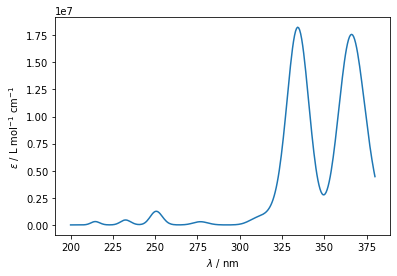

In [20]:
# http://www.grant-hill.group.shef.ac.uk/plot-uv.html
def uv_vis_spectra(frequencies_dict, x, stdev, type='gauss', gamma=None):
    bands = [f["frequency"] for f in frequencies_dict[0]] # Excitation energies in nm
    intensities = [f["IR_intensity"] for f in frequencies_dict[0]] # Oscillator strengths (dimensionless)
    composite = 0
    for count,band in enumerate(bands):
        strength = intensities[count]
        if type == 'gauss': 
            thispeak = 1.3062974e8 * (strength / (1e7/stdev))  * np.exp(-(((1.0/x)-(1.0/band))/(1.0/stdev))**2)
        if type == 'lorentz': 
            thispeak = 1.3062974e8 * (strength / (1e7/stdev)) * ((gamma**2)/((x - band)**2 + gamma**2))
        composite += thispeak
    return x, composite


freq_dict = master_data.iloc[1].frequencies_dict
stdev = 12398.4 # A sqrt(2) * standard deviation of 0.4 eV is 3099.6 nm. 0.1 eV is 12398.4 nm. 0.2 eV is 6199.2 nm.
gamma = 12.5 # For Lorentzians, gamma is half bandwidth at half peak height (nm)    

x = np.linspace(200,380,300)
x, y = uv_vis_spectra(freq_dict, x, stdev)
fig, ax = plt.subplots()
ax.plot(x,y)
fig.patch.set_facecolor("w")
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$\epsilon$ / L mol$^{-1}$ cm$^{-1}$')

plt.show()
